In [1]:
import osmnx as ox
%matplotlib inline
ox.config(log_file=True, log_console=True, use_cache=True)

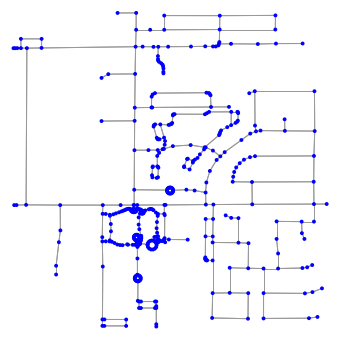

In [2]:
#Create a street network and then simplify it
# create a network around some (lat, lon) point and plot it
location_point = (33.299896, -111.831638)
G = ox.graph_from_point(location_point, distance=500, simplify=False)
fig, ax = ox.plot_graph(G, node_color='b', node_zorder=3)

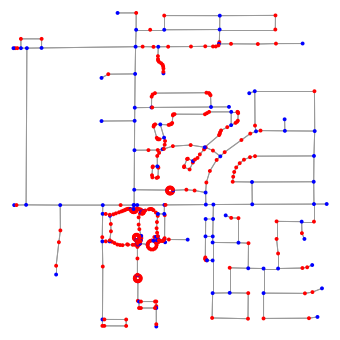

In [3]:
# show which nodes we'd remove if we simplify it
nc = ['b' if ox.is_endpoint(G, node) else 'r' for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_color=nc, node_zorder=3)

In [4]:
# simplify the network
G2 = G.copy()
G2 = ox.simplify_graph(G2)

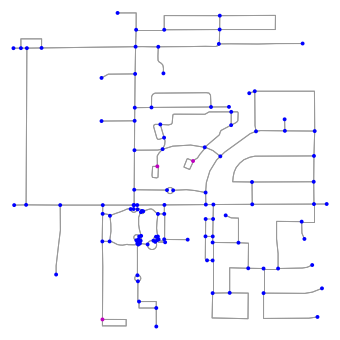

In [5]:
# plot the simplified network and show any loops in magenta
loops = [edge[0] for edge in G2.selfloop_edges()]
nc = ['m' if node in loops else 'b' for node in G2.nodes()]
fig, ax = ox.plot_graph(G2, node_color=nc, node_zorder=3)

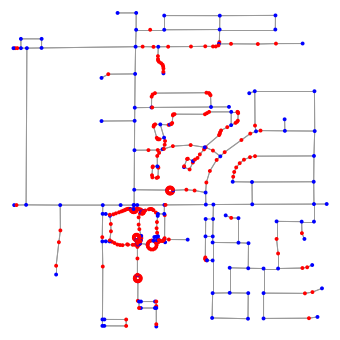

In [6]:
# turn off strict mode and see what nodes we'd remove
nc = ['b' if ox.is_endpoint(G, node, strict=False) else 'r' for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_color=nc, node_zorder=3)

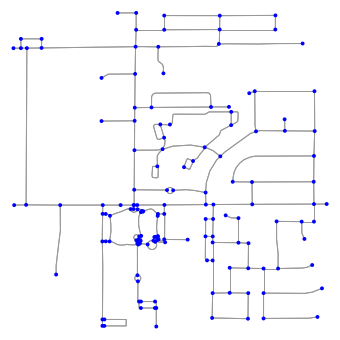

In [7]:
# simplify network with strict mode turned off
G3 = G.copy()
G3 = ox.simplify_graph(G3, strict=False)
fig, ax = ox.plot_graph(G3, node_color='b', node_zorder=3)

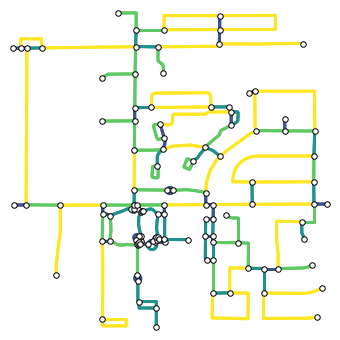

In [8]:
# show the strictly simplified network with edges colored by network length
ec = ox.get_edge_colors_by_attr(G2, attr='length')
fig, ax = ox.plot_graph(G2, node_color='w', node_edgecolor='k', node_size=30, node_zorder=3, edge_color=ec, edge_linewidth=3)

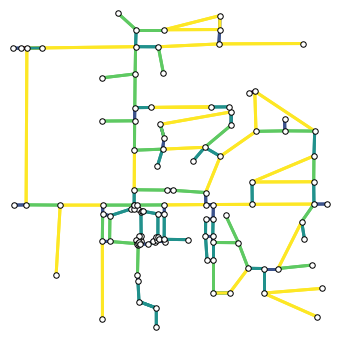

In [9]:
# plot same network again (topologically isomorphic), this time ignoring the edges' spatial geometry
ec = ox.get_edge_colors_by_attr(G2, attr='length')
fig, ax = ox.plot_graph(G2, node_color='w', node_edgecolor='k', node_size=30, node_zorder=3, 
                           edge_color=ec, edge_linewidth=3, edge_alpha=1, use_geom=False)

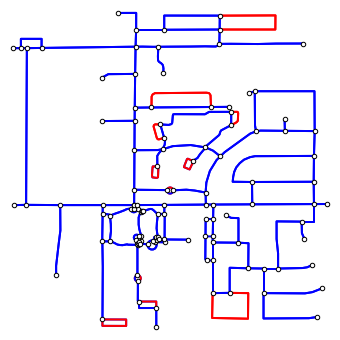

In [10]:
# highlight all parallel edges
ec = ['b' if key == 0 else 'r' for u, v, key in G2.edges(keys=True)]
fig, ax = ox.plot_graph(G2, node_color='w', node_edgecolor='k', node_size=20, node_zorder=3, edge_color=ec, edge_linewidth=2)

In [11]:
#Cleaning up the periphery of the network
# get some bbox
bbox = ox.bbox_from_point((45.518698, -122.679964), distance=300)
north, south, east, west = bbox

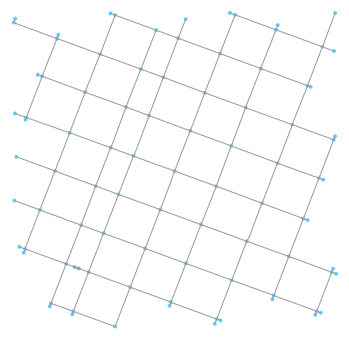

In [12]:
G = ox.graph_from_bbox(north, south, east, west, network_type='drive', clean_periphery=False)
fig, ax = ox.plot_graph(ox.project_graph(G))

In [17]:
# the node degree distribution for this graph has many false cul-de-sacs
k = dict(G.degree())
{n:list(k.values()).count(n) for n in range(max(k.values()) + 1)}

{0: 0, 1: 29, 2: 2, 3: 7, 4: 52}

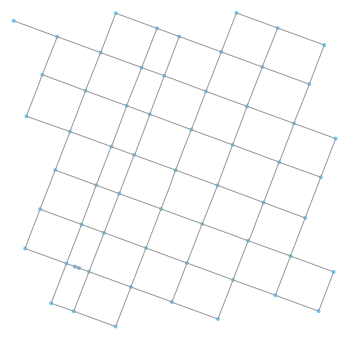

In [13]:
G = ox.graph_from_bbox(north, south, east, west, network_type='drive')
fig, ax = ox.plot_graph(ox.project_graph(G))

In [14]:
# the streets_per_node distribution for this cleaned up graph is more accurate
# dict keys = count of streets emanating from the node (ie, intersections and dead-ends)
# dict vals = number of nodes with that count
k = G.graph['streets_per_node']
{n:list(k.values()).count(n) for n in range(max(k.values()) + 1)}

{0: 0, 1: 0, 2: 0, 3: 3, 4: 58}

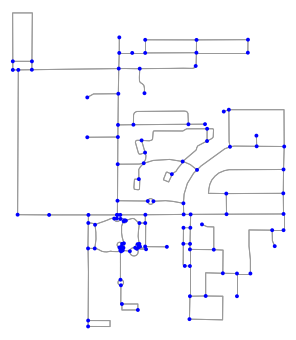

In [15]:
#Compare the network below to the ones in the section above
location_point = (33.299896, -111.831638)
G = ox.graph_from_point(location_point, distance=500, simplify=True)
fig, ax = ox.plot_graph(G, node_color='b', node_zorder=3)

In [16]:
#Create a 'drivable' street network for downtown SF then simplify it
location_point = (37.791427, -122.410018)
G = ox.graph_from_point(location_point, distance=1500, network_type='drive', simplify=False)

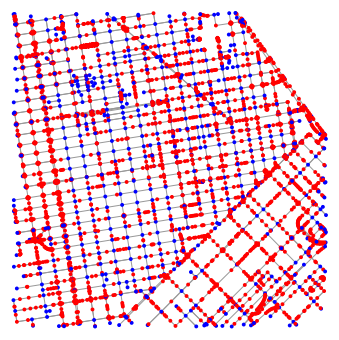

In [17]:
nc = ['b' if ox.is_endpoint(G, node) else 'r' for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_color=nc, node_zorder=3)

In [18]:
G2 = G.copy()
G2 = ox.simplify_graph(G2)

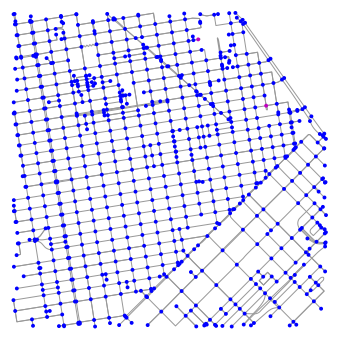

In [19]:
loops = [edge[0] for edge in G2.selfloop_edges()]
nc = ['m' if node in loops else 'b' for node in G2.nodes()]
fig, ax = ox.plot_graph(G2, node_color=nc, node_zorder=3)

In [20]:
G = ox.graph_from_address('N. Sicily Pl., Chandler, Arizona', distance=800, network_type='drive', simplify=False)

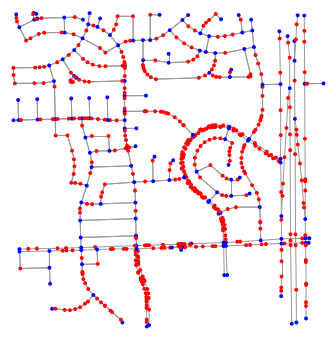

In [21]:
nc = ['b' if ox.is_endpoint(G, node) else 'r' for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_color=nc, node_zorder=3)

In [22]:
G2 = G.copy()
G2 = ox.simplify_graph(G2)

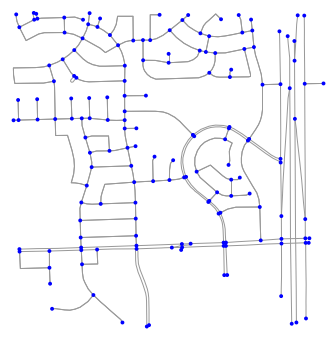

In [23]:
fig, ax = ox.plot_graph(G2, node_color='b', node_zorder=3)

In [24]:
# save as ESRI shapefile
ox.save_graph_shapefile(G2, filename='arizona')

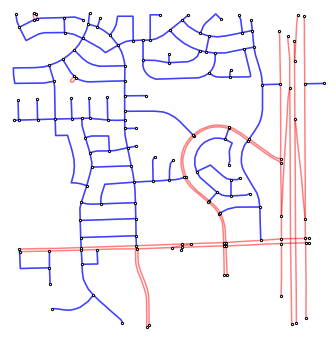

In [25]:
# highlight one-way streets
ec = ['r' if data['oneway'] else 'b' for u, v, key, data in G2.edges(keys=True, data=True)]
fig, ax = ox.plot_graph(G2, node_color='w', node_edgecolor='k', node_size=5, node_zorder=3, 
                           edge_color=ec, edge_linewidth=1.5, edge_alpha=0.5)